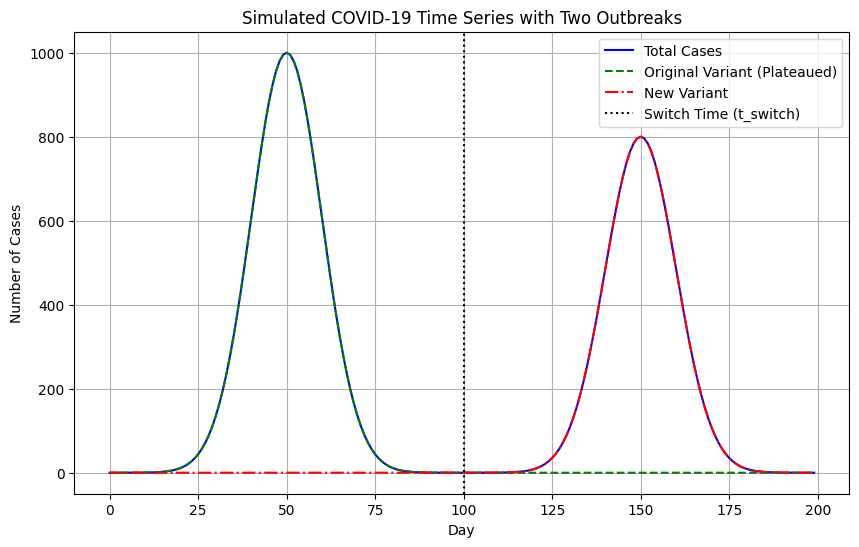

Data has been saved to datasetStageOne.csv


In [1]:
#Stage 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

total_days = 200        # The total number of days in the time series
t_switch = 100          # day when the new variant starts
days = np.arange(total_days)

# parameters for the first outbreak (the original variant)
amp1 = 1000             # amplitude (peak number of cases)
mu1 = 50                # center (day of peak)
sigma1 = 10             # spread (standard deviation)

# the Parameters for the second outbreak (new variant)
amp2 = 800              # amplitude for new variant
mu2 = t_switch + 50     # center for new variant (relative to t_switch)
sigma2 = 10             # spread for new variant


# Generate the first outbreak curve
# Compute the Gaussian curve for all days.
cases_variant1 = amp1 * np.exp(-((days - mu1) ** 2) / (2 * sigma1 ** 2))

# For times at and after t_switch, assume the original outbreak has plateaued.
plateau_value = cases_variant1[t_switch - 1]  # use the value just before t_switch
cases_variant1[t_switch:] = plateau_value


# Generate the second outbreak curve

# Initialize with zeros for all days.
cases_variant2 = np.zeros(total_days)

# For days at and after t_switch, generate the new variant outbreak.
cases_variant2[t_switch:] = amp2 * np.exp(-((days[t_switch:] - mu2) ** 2) / (2 * sigma2 ** 2))

total_cases = cases_variant1 + cases_variant2

#plot results

plt.figure(figsize=(10, 6))
plt.plot(days, total_cases, label='Total Cases', color='blue')
plt.plot(days, cases_variant1, label='Original Variant (Plateaued)', linestyle='--', color='green')
plt.plot(days, cases_variant2, label='New Variant', linestyle='-.', color='red')
plt.axvline(t_switch, color='black', linestyle=':', label='Switch Time (t_switch)')
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.title("Simulated COVID-19 Time Series with Two Outbreaks")
plt.legend()
plt.grid(True)
plt.show()


# create dataframe
df = pd.DataFrame({
    'Day': days,
    'Total_Cases': total_cases,
    'Cases_Variant1': cases_variant1,
    'Cases_Variant2': cases_variant2
})

# Save to a csv file 
df.to_csv("datasetStageOne.csv", index=False)

print("Data has been saved to datasetStageOne.csv")


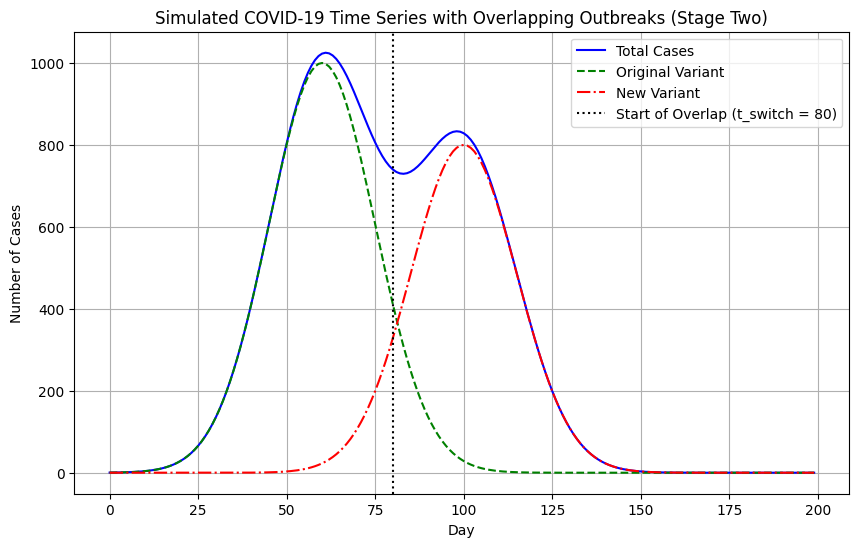

Data has been saved to datasetStageTwo.csv


In [1]:
#Stage 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

total_days = 200        # Total number of days in the time series
days = np.arange(total_days)

# t_switch is defined as the day when the new variant outbreak begins to become significant.
t_switch = 80           # This value is answer the solution should give


# Parameters for the original outbreak (original variant)

amp1 = 1000             # Peak number of cases for the original variant
mu1 = 60                # Center (day of peak) for the original variant
sigma1 = 15             # Spread (standard deviation) for the original variant

# Parameters for the new outbreak (new variant)

amp2 = 800              # Peak number of cases for the new variant
mu2 = 100               # Center (peak) for the new variant
sigma2 = 15             # Spread (standard deviation) for the new variant


# Original variant curve (no plateau, continues naturally)
cases_variant1 = amp1 * np.exp(-((days - mu1) ** 2) / (2 * sigma1 ** 2))

# New variant curve (which overlaps with the tail of the original variant)
cases_variant2 = amp2 * np.exp(-((days - mu2) ** 2) / (2 * sigma2 ** 2))

total_cases = cases_variant1 + cases_variant2

# plot results

plt.figure(figsize=(10, 6))
plt.plot(days, total_cases, label='Total Cases', color='blue')
plt.plot(days, cases_variant1, label='Original Variant', linestyle='--', color='green')
plt.plot(days, cases_variant2, label='New Variant', linestyle='-.', color='red')
plt.axvline(t_switch, color='black', linestyle=':', label=f'Start of Overlap (t_switch = {t_switch})')
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.title("Simulated COVID-19 Time Series with Overlapping Outbreaks (Stage Two)")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# Save the data to a CSV file
# -------------------------

# Create a DataFrame with the data
df = pd.DataFrame({
    'Day': days,
    'Total_Cases': total_cases,
    'Cases_Variant1': cases_variant1,
    'Cases_Variant2': cases_variant2
})

# Save the DataFrame to a CSV file named 'datasetStageTwo.csv'
df.to_csv("datasetStageTwo.csv", index=False)

print("Data has been saved to datasetStageTwo.csv")


In [3]:
import subprocess
import sys

def install(package):
    """Install a package using pip."""
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

try:
    import scipy
    print("SciPy is already installed.")
except ImportError:
    print("SciPy not found. Installing SciPy...")
    install("scipy")
    print("SciPy has been installed successfully.")

import scipy
print("SciPy version:", scipy.__version__)


SciPy not found. Installing SciPy...
SciPy has been installed successfully.
SciPy version: 1.15.1


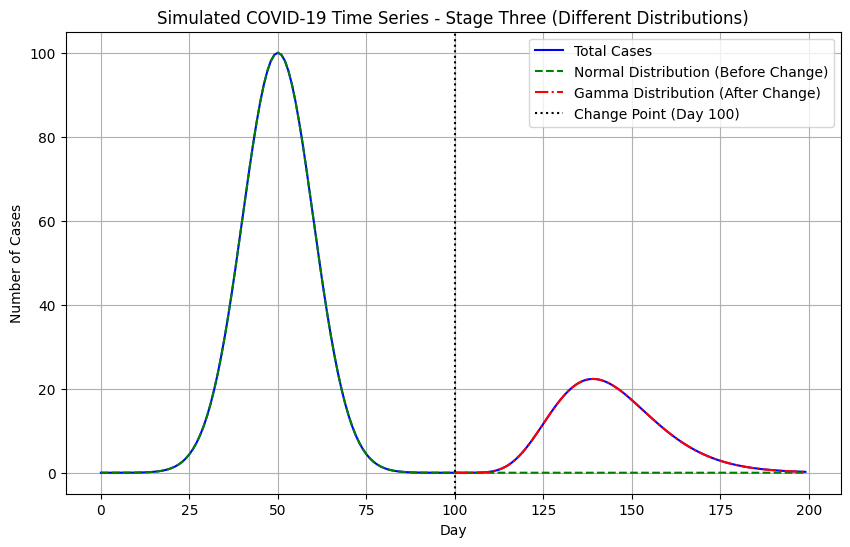

Data has been saved to datasetStageThree.csv


In [ ]:
#Stage 3 outdated
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gamma  # for the gamma distribution


total_days = 200       # Total number of days in the time series
days = np.arange(total_days)

# Define the change point t at which the distribution model switches
change_point = 100     # t


# Distribution 1:
amp1 = 100            # Amplitude
mu1 = 50               # Mean 
sigma1 = 10            # Standard deviation 
# Compute the Gaussian curve for all the days
cases_normal = amp1 * np.exp(-((days - mu1) ** 2) / (2 * sigma1 ** 2))
# Only keep values before the change point; after that, set to 0
cases_normal[days >= change_point] = 0

# Distribution 2
# For the gamma distribution we shift the time axis so that it starts at the change point.
t_gamma = days[days >= change_point] - change_point + 1  # +1 avoids starting at 0
amp2 = 800             # Scaling factor for the gamma distribution
a = 9                  # Shape parameter (often denoted as 'k' in gamma distribution literature)
scale = 5              # Scale parameter (θ)
# Compute the gamma probability density function and scale it by amp2
cases_gamma = amp2 * gamma.pdf(t_gamma, a, scale=scale)

# Combine the distributions
# Total cases: use the normal curve for days before the change point and the gamma curve for days at/after the change point.
total_cases = cases_normal.copy()
total_cases[days >= change_point] = cases_gamma

# plot the results

plt.figure(figsize=(10, 6))
plt.plot(days, total_cases, label='Total Cases', color='blue')
plt.plot(days, cases_normal, label='Normal Distribution (Before Change)', linestyle='--', color='green')
plt.plot(days[days >= change_point], cases_gamma, label='Gamma Distribution (After Change)', linestyle='-.', color='red')
plt.axvline(change_point, color='black', linestyle=':', label=f'Change Point (Day {change_point})')
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.title("Simulated COVID-19 Time Series - Stage Three (Different Distributions)")
plt.legend()
plt.grid(True)
plt.show()

cases_gamma_full = np.zeros(total_days)
cases_gamma_full[days >= change_point] = cases_gamma

df = pd.DataFrame({
    'Day': days,
    'Total_Cases': total_cases,
    'Cases_Distribution1': cases_normal,
    'Cases_Distribution2': cases_gamma_full
})

df.to_csv("datasetStageThree.csv", index=False)
print("Data has been saved to datasetStageThree.csv")


Data has been saved to datasetStageThree_Adjusted.csv


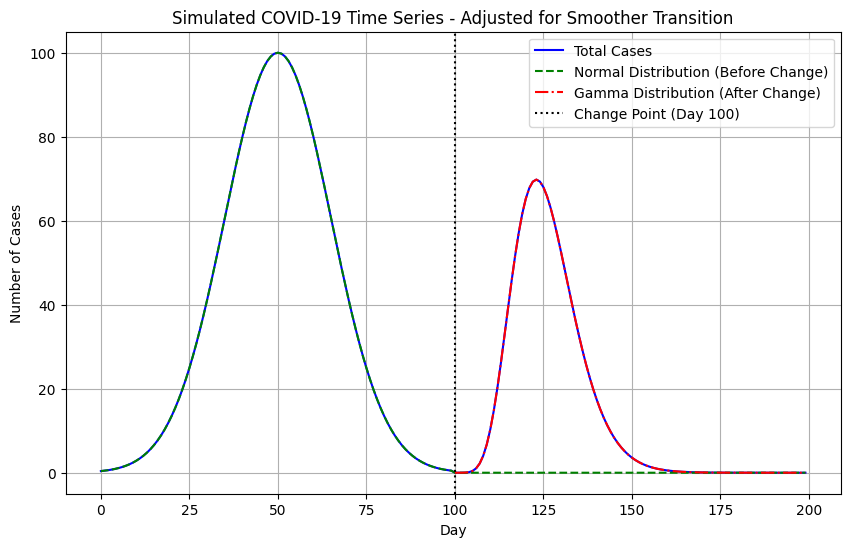

In [2]:
#stage three version two
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gamma  # for the gamma distribution

# Total number of days in the time series
total_days = 200       
days = np.arange(total_days)

# Define the change point at which the distribution model switches
change_point = 100     

# Normal Distribution Parameters (Before Change Point)
amp1 = 100            # Amplitude
mu1 = 50             # Mean 
sigma1 = 15          # Increased standard deviation for smoother transition

# Compute the Gaussian curve for all the days
cases_normal = amp1 * np.exp(-((days - mu1) ** 2) / (2 * sigma1 ** 2))
cases_normal[days >= change_point] = 0  # Set to 0 after the change point

# Gamma Distribution Parameters (After Change Point)
t_gamma = days[days >= change_point] - change_point + 1  # Shift to start at 1
amp2 = 1500           # Increased amplitude for a smoother transition
a = 9                 # Shape parameter
scale = 3             # Reduced scale for a faster rise

# Compute the gamma probability density function
cases_gamma = amp2 * gamma.pdf(t_gamma, a, scale=scale)

# Combine the distributions
total_cases = cases_normal.copy()
total_cases[days >= change_point] = cases_gamma

# Full gamma cases array (for CSV output)
cases_gamma_full = np.zeros(total_days)
cases_gamma_full[days >= change_point] = cases_gamma

# Create DataFrame and save to CSV
df = pd.DataFrame({
    'Day': days,
    'Total_Cases': total_cases,
    'Cases_Distribution1': cases_normal,
    'Cases_Distribution2': cases_gamma_full
})
df.to_csv("datasetStageThree_Adjusted.csv", index=False)
print("Data has been saved to datasetStageThree_Adjusted.csv")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(days, total_cases, label='Total Cases', color='blue')
plt.plot(days, cases_normal, label='Normal Distribution (Before Change)', linestyle='--', color='green')
plt.plot(days[days >= change_point], cases_gamma, label='Gamma Distribution (After Change)', linestyle='-.', color='red')
plt.axvline(change_point, color='black', linestyle=':', label=f'Change Point (Day {change_point})')
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.title("Simulated COVID-19 Time Series - Adjusted for Smoother Transition")
plt.legend()
plt.grid(True)
plt.show()


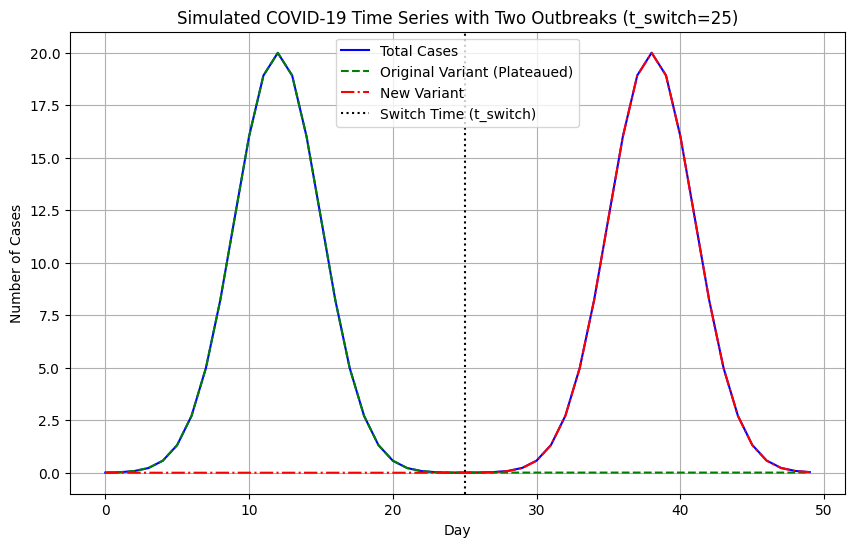

Data has been saved to stage1version2.csv


In [ ]:
#stage one smaller version
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

# -----------------------------
# CONFIGURATION
# -----------------------------
total_days = 50        # The total number of days in the time series
t_switch = 25           # Day when the new variant starts
days = np.arange(total_days)

# First outbreak (original variant)
amp1 = 20             # Amplitude (peak number of cases)
mu1 = 12                # Center (day of peak)
sigma1 = 3             # Spread (standard deviation)

# Second outbreak (new variant)
amp2 = 20              # Amplitude for new variant
mu2 = 38               # Center for new variant
sigma2 = 3             # Spread for new variant

# -----------------------------
# GENERATE OUTBREAK CURVES
# -----------------------------

# 1) First outbreak
cases_variant1 = amp1 * np.exp(-((days - mu1) ** 2) / (2 * sigma1 ** 2))

# After t_switch, plateau the first outbreak
plateau_value = cases_variant1[t_switch - 1]  # use the value just before t_switch
cases_variant1[t_switch:] = plateau_value

# 2) Second outbreak (only after t_switch)
cases_variant2 = np.zeros(total_days)
cases_variant2[t_switch:] = amp2 * np.exp(
    -((days[t_switch:] - mu2) ** 2) / (2 * sigma2 ** 2)
)

# Combine into total
total_cases = cases_variant1 + cases_variant2


plt.figure(figsize=(10, 6))
plt.plot(days, total_cases, label='Total Cases', color='blue')
plt.plot(days, cases_variant1, label='Original Variant (Plateaued)', 
         linestyle='--', color='green')
plt.plot(days, cases_variant2, label='New Variant', 
         linestyle='-.', color='red')
plt.axvline(t_switch, color='black', linestyle=':', label='Switch Time (t_switch)')
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.title("Simulated COVID-19 Time Series with Two Outbreaks (t_switch=25)")
plt.legend()
plt.grid(True)
plt.show()


df = pd.DataFrame({
    'Day': days,
    'Total_Cases': total_cases,
    'Cases_Variant1': cases_variant1,
    'Cases_Variant2': cases_variant2
})

df.to_csv("stage1version2.csv", index=False)
print("Data has been saved to stage1version2.csv")


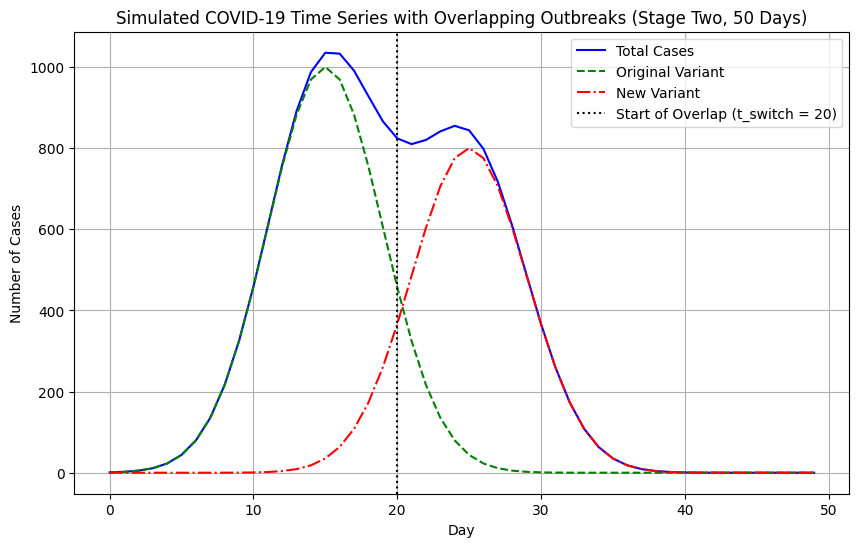

Data has been saved to datasetStageTwo_50days.csv


In [8]:
#stage 2 smaller version
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Total number of days in the time series
total_days = 50       
days = np.arange(total_days)

# t_switch is defined as the day when the new variant outbreak begins to become significant.
t_switch = 20  # scaled down from 80 in the original dataset

# Parameters for the original outbreak (original variant)
amp1 = 1000    # Peak number of cases for the original variant
mu1 = 15       # Center (day of peak) for the original variant (scaled from 60)
sigma1 = 4     # Spread (standard deviation) for the original variant (scaled from 15)

# Parameters for the new outbreak (new variant)
amp2 = 800     # Peak number of cases for the new variant
mu2 = 25       # Center (day of peak) for the new variant (scaled from 100)
sigma2 = 4     # Spread (standard deviation) for the new variant (scaled from 15)

# Original variant curve (no plateau, continues naturally)
cases_variant1 = amp1 * np.exp(-((days - mu1) ** 2) / (2 * sigma1 ** 2))

# New variant curve (which overlaps with the tail of the original variant)
cases_variant2 = amp2 * np.exp(-((days - mu2) ** 2) / (2 * sigma2 ** 2))

# Total cases are the sum of both outbreaks
total_cases = cases_variant1 + cases_variant2

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(days, total_cases, label='Total Cases', color='blue')
plt.plot(days, cases_variant1, label='Original Variant', linestyle='--', color='green')
plt.plot(days, cases_variant2, label='New Variant', linestyle='-.', color='red')
plt.axvline(t_switch, color='black', linestyle=':', label=f'Start of Overlap (t_switch = {t_switch})')
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.title("Simulated COVID-19 Time Series with Overlapping Outbreaks (Stage Two, 50 Days)")
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame with the data
df = pd.DataFrame({
    'Day': days,
    'Total_Cases': total_cases,
    'Cases_Variant1': cases_variant1,
    'Cases_Variant2': cases_variant2
})

# Save the DataFrame to a CSV file
df.to_csv("datasetStageTwo_50days.csv", index=False)
print("Data has been saved to datasetStageTwo_50days.csv")


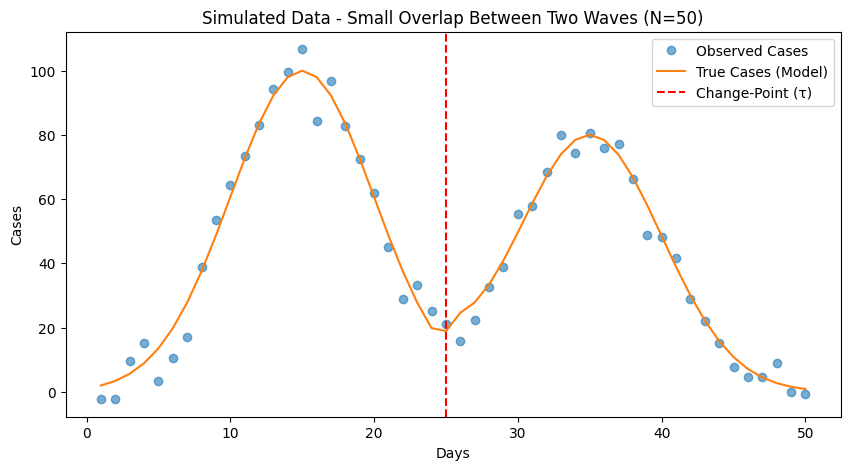

Dataset saved as: simulated_stage_two_small_overlap.csv
   Day  Observed_Cases  True_Cases   Variant1      Variant2      Weight_w
0    1       -2.291428    1.984109   1.984109  5.582950e-61  7.667648e-53
1    2       -2.095489    3.404745   3.404745  3.164395e-58  1.137980e-50
2    3        9.662350    5.613476   5.613476  1.723241e-55  1.688912e-48
3    4       15.114395    8.892162   8.892162  9.016323e-53  2.506567e-46
4    5        3.505453   13.533528  13.533528  4.532535e-50  3.720076e-44


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for saving data

# Parameters
N = 50  # Number of days
amp1 = 100  # Peak cases of first wave
amp2 = 80  # Peak cases of second wave
mu1 = 15   # Peak day of first wave
mu2 = 35   # Peak day of second wave (close to tau)
sigma1 = 5  # Spread of first wave
sigma2 = 5  # Spread of second wave
tau = 25   # Change-point (transition day)
sigma_obs = 5  # Observation noise (random fluctuations)

# Generate two Gaussian-distributed waves
days = np.arange(1, N + 1)
variant1 = amp1 * np.exp(-((days - mu1) ** 2) / (2 * sigma1 ** 2))
variant2 = amp2 * np.exp(-((days - mu2) ** 2) / (2 * sigma2 ** 2))

# Small overlap: Only a small contribution from variant2 before tau
w = 1 / (1 + np.exp(-5 * (days - tau)))  # Logistic function (small overlap)
mu_cases = variant1 + variant2 * w  # Combined cases with smooth transition

# Add observational noise
observed_cases = mu_cases + np.random.normal(0, sigma_obs, size=N)

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(days, observed_cases, 'o', label="Observed Cases", alpha=0.6)
plt.plot(days, mu_cases, label="True Cases (Model)")
plt.axvline(x=tau, color='r', linestyle='--', label="Change-Point (τ)")
plt.xlabel("Days")
plt.ylabel("Cases")
plt.legend()
plt.title("Simulated Data - Small Overlap Between Two Waves (N=50)")
plt.show()

# Create a DataFrame to save the dataset
df = pd.DataFrame({
    "Day": days,
    "Observed_Cases": observed_cases,
    "True_Cases": mu_cases,
    "Variant1": variant1,
    "Variant2": variant2 * w,
    "Weight_w": w  # Logistic weight for transition
})

# Save the dataset as a CSV file
csv_filename = "simulated_stage_two_small_overlap.csv"
df.to_csv(csv_filename, index=False)

# Print a preview of the dataset
print("Dataset saved as:", csv_filename)
print(df.head())  # Display first few rows


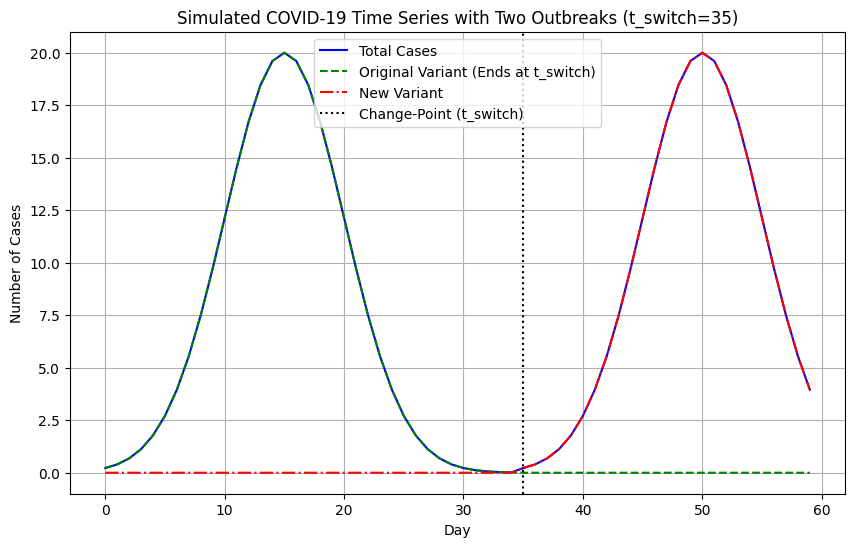

In [3]:
#different t 
# Adjusting the code to make the change point at day 35 and dataset 60 days long
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

# -----------------------------
# CONFIGURATION
# -----------------------------
total_days = 60        # The total number of days in the time series
t_switch = 35          # Day when the new variant starts
days = np.arange(total_days)

# First outbreak (original variant)
amp1 = 20             # Amplitude (peak number of cases)
mu1 = 15             # Center (day of peak)
sigma1 = 5            # Spread (standard deviation)

# Second outbreak (new variant)
amp2 = 20             # Amplitude for new variant
mu2 = 50             # Center for new variant
sigma2 = 5            # Spread for new variant

# -----------------------------
# GENERATE OUTBREAK CURVES
# -----------------------------

# 1) First outbreak
cases_variant1 = amp1 * np.exp(-((days - mu1) ** 2) / (2 * sigma1 ** 2))

# After t_switch, plateau the first outbreak
plateau_value = cases_variant1[t_switch - 1]  # use the value just before t_switch
cases_variant1[t_switch:] = 0  # Stop the first variant at t_switch

# 2) Second outbreak (only after t_switch)
cases_variant2 = np.zeros(total_days)
cases_variant2[t_switch:] = amp2 * np.exp(
    -((days[t_switch:] - mu2) ** 2) / (2 * sigma2 ** 2)
)

# Combine into total
total_cases = cases_variant1 + cases_variant2

# -----------------------------
# PLOTTING RESULTS
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(days, total_cases, label='Total Cases', color='blue')
plt.plot(days, cases_variant1, label='Original Variant (Ends at t_switch)', 
         linestyle='--', color='green')
plt.plot(days, cases_variant2, label='New Variant', 
         linestyle='-.', color='red')
plt.axvline(t_switch, color='black', linestyle=':', label='Change-Point (t_switch)')
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.title("Simulated COVID-19 Time Series with Two Outbreaks (t_switch=35)")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# SAVE DATASET
# -----------------------------
df = pd.DataFrame({
    'Day': days,
    'Total_Cases': total_cases,
    'Cases_Variant1': cases_variant1,
    'Cases_Variant2': cases_variant2
})
    
csv_filename = "t35.csv"
df.to_csv(csv_filename, index=False)



Data has been saved to datasetStageThree_50days_Adjusted.csv


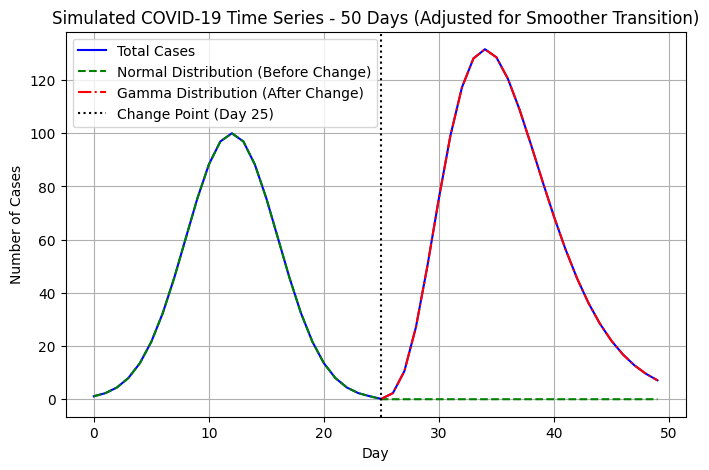

In [1]:
#stage three small version
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gamma  # for the gamma distribution

# Total number of days in the time series
TOTAL_DAYS = 50        # Reduced from 200 to 50
CHANGE_POINT = 25      # Adjusted proportionally from 100

days = np.arange(TOTAL_DAYS)

# Normal Distribution Parameters (Before Change Point)
AMP1 = 100            # Amplitude
MU1 = 12              # Adjusted mean (previously 50 for 200 days)
SIGMA1 = 4            # Adjusted standard deviation (previously 15)

# Compute the Gaussian curve for all the days
cases_normal = AMP1 * np.exp(-((days - MU1) ** 2) / (2 * SIGMA1 ** 2))
cases_normal[days >= CHANGE_POINT] = 0  # Set to 0 after the change point

# Gamma Distribution Parameters (After Change Point)
t_gamma = days[days >= CHANGE_POINT] - CHANGE_POINT + 1  # Shift to start at 1
AMP2 = 1500           # Same increased amplitude for smooth transition
A = 6                 # Adjusted shape parameter (previously 9)
SCALE = 2             # Reduced scale for a faster rise in the shorter period

# Compute the gamma probability density function
cases_gamma = AMP2 * gamma.pdf(t_gamma, A, scale=SCALE)

# Combine the distributions
total_cases = cases_normal.copy()
total_cases[days >= CHANGE_POINT] = cases_gamma

# Full gamma cases array (for CSV output)
cases_gamma_full = np.zeros(TOTAL_DAYS)
cases_gamma_full[days >= CHANGE_POINT] = cases_gamma

# Create DataFrame and save to CSV
df = pd.DataFrame({
    'Day': days,
    'Total_Cases': total_cases,
    'Cases_Distribution1': cases_normal,
    'Cases_Distribution2': cases_gamma_full
})
df.to_csv("datasetStageThree_50days_Adjusted.csv", index=False)
print("Data has been saved to datasetStageThree_50days_Adjusted.csv")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(days, total_cases, label='Total Cases', color='blue')
plt.plot(days, cases_normal, label='Normal Distribution (Before Change)', linestyle='--', color='green')
plt.plot(days[days >= CHANGE_POINT], cases_gamma, label='Gamma Distribution (After Change)', linestyle='-.', color='red')
plt.axvline(CHANGE_POINT, color='black', linestyle=':', label=f'Change Point (Day {CHANGE_POINT})')
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.title("Simulated COVID-19 Time Series - 50 Days (Adjusted for Smoother Transition)")
plt.legend()
plt.grid(True)
plt.show()


Generating multiple datasets to use with the same prior and seeing how good the prediction is.

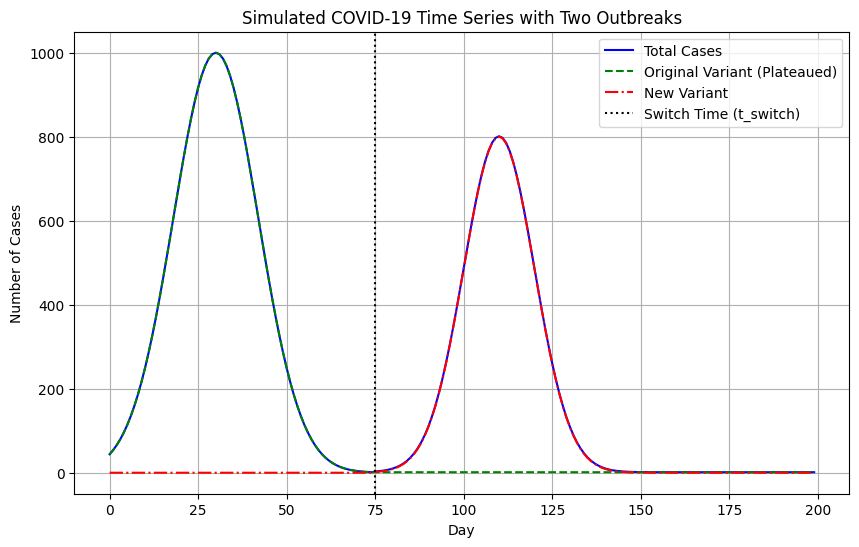

In [8]:
#dataset 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

total_days = 200        # The total number of days in the time series
t_switch = 75          # day when the new variant starts
days = np.arange(total_days)

# parameters for the first outbreak (the original variant)
amp1 = 1000             # amplitude (peak number of cases)
mu1 = 30                # center (day of peak)
sigma1 = 12             # spread (standard deviation)

# the Parameters for the second outbreak (new variant)
amp2 = 800              # amplitude for new variant
mu2 = t_switch + 35     # center for new variant (relative to t_switch)
sigma2 = 10             # spread for new variant


# Generate the first outbreak curve
# Compute the Gaussian curve for all days.
cases_variant1 = amp1 * np.exp(-((days - mu1) ** 2) / (2 * sigma1 ** 2))

# For times at and after t_switch, assume the original outbreak has plateaued.
plateau_value = cases_variant1[t_switch - 1]  # use the value just before t_switch
cases_variant1[t_switch:] = plateau_value


# Generate the second outbreak curve

# Initialize with zeros for all days.
cases_variant2 = np.zeros(total_days)

# For days at and after t_switch, generate the new variant outbreak.
cases_variant2[t_switch:] = amp2 * np.exp(-((days[t_switch:] - mu2) ** 2) / (2 * sigma2 ** 2))

total_cases = cases_variant1 + cases_variant2

#plot results

plt.figure(figsize=(10, 6))
plt.plot(days, total_cases, label='Total Cases', color='blue')
plt.plot(days, cases_variant1, label='Original Variant (Plateaued)', linestyle='--', color='green')
plt.plot(days, cases_variant2, label='New Variant', linestyle='-.', color='red')
plt.axvline(t_switch, color='black', linestyle=':', label='Switch Time (t_switch)')
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.title("Simulated COVID-19 Time Series with Two Outbreaks")
plt.legend()
plt.grid(True)
plt.show()


# create dataframe
df = pd.DataFrame({
    'Day': days,
    'Total_Cases': total_cases,
    'Cases_Variant1': cases_variant1,
    'Cases_Variant2': cases_variant2
})

# Save to a csv file 
df.to_csv("multipleDatasets1.csv", index=False)



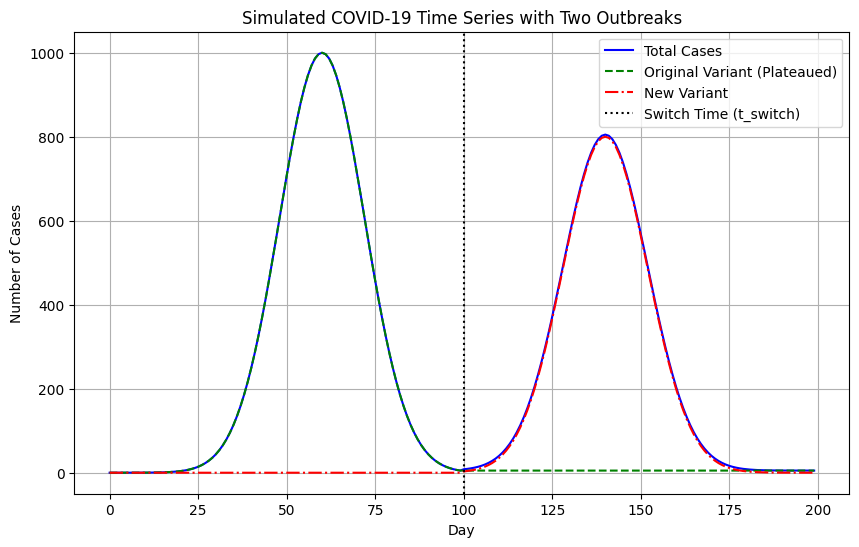

In [10]:
#dataset2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

total_days = 200        # The total number of days in the time series
t_switch = 100          # day when the new variant starts
days = np.arange(total_days)

# parameters for the first outbreak (the original variant)
amp1 = 1000             # amplitude (peak number of cases)
mu1 = 60                # center (day of peak)
sigma1 = 12             # spread (standard deviation)

# the Parameters for the second outbreak (new variant)
amp2 = 800              # amplitude for new variant
mu2 = t_switch + 40     # center for new variant (relative to t_switch)
sigma2 = 12             # spread for new variant


# Generate the first outbreak curve
# Compute the Gaussian curve for all days.
cases_variant1 = amp1 * np.exp(-((days - mu1) ** 2) / (2 * sigma1 ** 2))

# For times at and after t_switch, assume the original outbreak has plateaued.
plateau_value = cases_variant1[t_switch - 1]  # use the value just before t_switch
cases_variant1[t_switch:] = plateau_value


# Generate the second outbreak curve

# Initialize with zeros for all days.
cases_variant2 = np.zeros(total_days)

# For days at and after t_switch, generate the new variant outbreak.
cases_variant2[t_switch:] = amp2 * np.exp(-((days[t_switch:] - mu2) ** 2) / (2 * sigma2 ** 2))

total_cases = cases_variant1 + cases_variant2

#plot results

plt.figure(figsize=(10, 6))
plt.plot(days, total_cases, label='Total Cases', color='blue')
plt.plot(days, cases_variant1, label='Original Variant (Plateaued)', linestyle='--', color='green')
plt.plot(days, cases_variant2, label='New Variant', linestyle='-.', color='red')
plt.axvline(t_switch, color='black', linestyle=':', label='Switch Time (t_switch)')
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.title("Simulated COVID-19 Time Series with Two Outbreaks")
plt.legend()
plt.grid(True)
plt.show()


# create dataframe
df = pd.DataFrame({
    'Day': days,
    'Total_Cases': total_cases,
    'Cases_Variant1': cases_variant1,
    'Cases_Variant2': cases_variant2
})

# Save to a csv file 
df.to_csv("multipleDatasets2.csv", index=False)



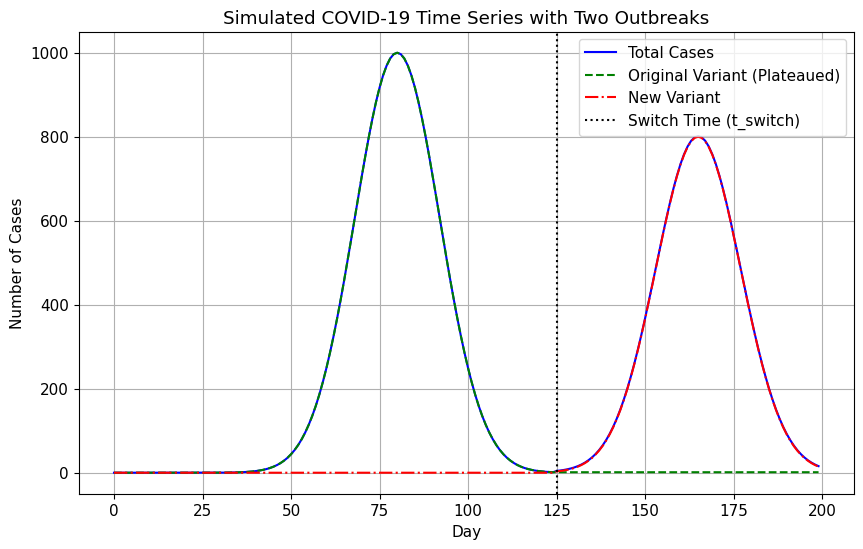

Data has been saved to datasetStageOne.csv


In [33]:
#dataset3

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

total_days = 200        # The total number of days in the time series
t_switch = 125         # day when the new variant starts
days = np.arange(total_days)

# parameters for the first outbreak (the original variant)
amp1 = 1000             # amplitude (peak number of cases)
mu1 = 80                # center (day of peak)
sigma1 = 12             # spread (standard deviation)

# the Parameters for the second outbreak (new variant)
amp2 = 800              # amplitude for new variant
mu2 = t_switch + 40     # center for new variant (relative to t_switch)
sigma2 = 12             # spread for new variant


# Generate the first outbreak curve
# Compute the Gaussian curve for all days.
cases_variant1 = amp1 * np.exp(-((days - mu1) ** 2) / (2 * sigma1 ** 2))

# For times at and after t_switch, assume the original outbreak has plateaued.
plateau_value = cases_variant1[t_switch - 1]  # use the value just before t_switch
cases_variant1[t_switch:] = plateau_value


# Generate the second outbreak curve

# Initialize with zeros for all days.
cases_variant2 = np.zeros(total_days)

# For days at and after t_switch, generate the new variant outbreak.
cases_variant2[t_switch:] = amp2 * np.exp(-((days[t_switch:] - mu2) ** 2) / (2 * sigma2 ** 2))

total_cases = cases_variant1 + cases_variant2

#plot results

plt.figure(figsize=(10, 6))
plt.plot(days, total_cases, label='Total Cases', color='blue')
plt.plot(days, cases_variant1, label='Original Variant (Plateaued)', linestyle='--', color='green')
plt.plot(days, cases_variant2, label='New Variant', linestyle='-.', color='red')
plt.axvline(t_switch, color='black', linestyle=':', label='Switch Time (t_switch)')
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.title("Simulated COVID-19 Time Series with Two Outbreaks")
plt.legend()
plt.grid(True)
plt.show()


# create dataframe
df = pd.DataFrame({
    'Day': days,
    'Total_Cases': total_cases,
    'Cases_Variant1': cases_variant1,
    'Cases_Variant2': cases_variant2
})

# Save to a csv file 
df.to_csv("multipleDatasets3.csv", index=False)

print("Data has been saved to datasetStageOne.csv")


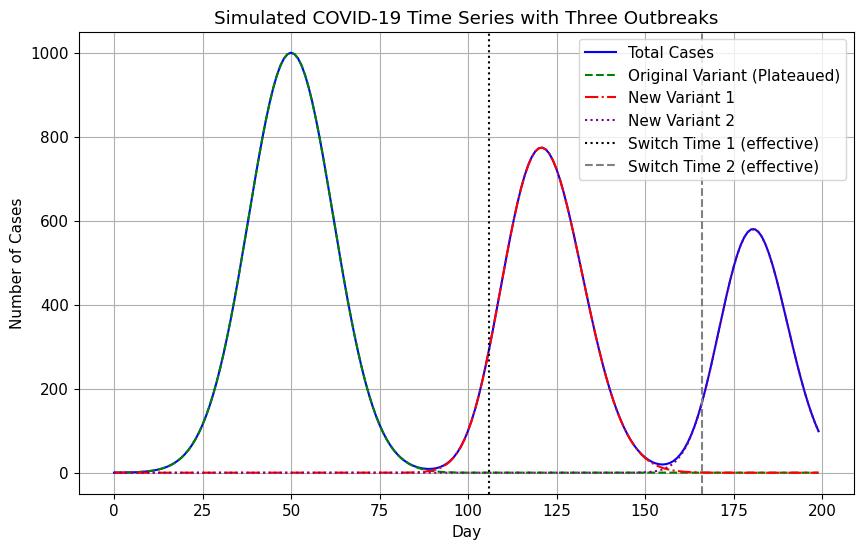

Data has been saved to multipleDatasets3.csv
Stan-compatible data saved to 'stan_data3.json'


In [35]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

total_days = 200        # Total number of days
t_switch_1 = 100       # When second variant starts
t_switch_2 = 160        # When third variant starts
days = np.arange(total_days)

# --- Parameters for each outbreak ---
# 1st outbreak
# parameters for the first outbreak (the original variant)
amp1 = 1000             
mu1 = 50                # Shifted earlier to avoid overlap
sigma1 = 12             
           

# 2nd outbreak
amp2 = 800              
mu2 = t_switch_1 + 20   
sigma2 = 12             

# 3rd outbreak
amp3 = 600              
mu3 = t_switch_2 + 20   
sigma3 = 10             

# --- Variant 1 (Gaussian + plateau) ---
cases_variant1 = amp1 * np.exp(-((days - mu1) ** 2) / (2 * sigma1 ** 2))
plateau_value = cases_variant1[t_switch_1 - 1]
cases_variant1[t_switch_1:] = plateau_value

# Smooth sigmoid switch for both variants
def smooth_switch(days, center, slope=5):
    return 1 / (1 + np.exp(-(days - center) / slope))

# Variant 2 (full curve * smooth fade-in)
full_curve_2 = amp2 * np.exp(-((days - mu2) ** 2) / (2 * sigma2 ** 2))
cases_variant2 = full_curve_2 * smooth_switch(days, t_switch_1, slope=6)

# Variant 3
full_curve_3 = amp3 * np.exp(-((days - mu3) ** 2) / (2 * sigma3 ** 2))
cases_variant3 = full_curve_3 * smooth_switch(days, t_switch_2, slope=6)


# --- Total cases ---
total_cases = cases_variant1 + cases_variant2 + cases_variant3

# --- Plot results ---
plt.figure(figsize=(10, 6))
plt.plot(days, total_cases, label='Total Cases', color='blue')
plt.plot(days, cases_variant1, label='Original Variant (Plateaued)', linestyle='--', color='green')
plt.plot(days, cases_variant2, label='New Variant 1', linestyle='-.', color='red')
plt.plot(days, cases_variant3, label='New Variant 2', linestyle=':', color='purple')
plt.axvline(t_switch_1 + 6, color='black', linestyle=':', label='Switch Time 1 (effective)')
plt.axvline(t_switch_2 + 6, color='gray', linestyle='--', label='Switch Time 2 (effective)')

plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.title("Simulated COVID-19 Time Series with Three Outbreaks")
plt.legend()
plt.grid(True)
plt.show()

# --- Save as DataFrame ---
df = pd.DataFrame({
    'Day': days,
    'Total_Cases': total_cases,
    'Cases_Variant1': cases_variant1,
    'Cases_Variant2': cases_variant2,
    'Cases_Variant3': cases_variant3
})

df.to_csv("3NormalDataset.csv", index=False)
print("Data has been saved to multipleDatasets3.csv")

# --- Stan-compatible format ---
stan_data = {
    "N": total_days,
    "y": total_cases.tolist()
}

import json
with open("stan_data3.json", "w") as f:
    json.dump(stan_data, f)

print("Stan-compatible data saved to 'stan_data3.json'")
